# geting gold data 

In [105]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [106]:
gold_symbol = 'GC=F'
data = yf.download(gold_symbol, start='2010-01-01', end=None)

[*********************100%%**********************]  1 of 1 completed


In [107]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-05,2442.000000,2449.800049,2367.399902,2401.699951,2401.699951,334
2024-08-06,2414.500000,2421.800049,2380.000000,2389.100098,2389.100098,163
2024-08-07,2392.199951,2401.000000,2384.500000,2390.500000,2390.500000,130
2024-08-08,2384.300049,2422.800049,2384.300049,2422.199951,2422.199951,201
2024-08-09,2422.300049,2432.100098,2418.500000,2432.100098,2432.100098,201


In [108]:
data.reset_index(inplace=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3673 non-null   datetime64[ns]
 1   Open       3673 non-null   float64       
 2   High       3673 non-null   float64       
 3   Low        3673 non-null   float64       
 4   Close      3673 non-null   float64       
 5   Adj Close  3673 non-null   float64       
 6   Volume     3673 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 201.0 KB


In [110]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# feature extraction

In [111]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

data['Name_week']=data['Date'].dt.day_name()

In [112]:
data['Dates']=data['Date']

In [113]:
data.set_index('Date',inplace=True)

In [114]:
data.sample()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day,Name_week,Dates
Date,,,,,,,,,,,
2014-09-29,1216.300049,1222.199951,1214.800049,1217.5,1217.5,6344,2014,9,29,Monday,2014-09-29


In [115]:
data.shape

(3673, 11)

<Axes: xlabel='Date'>

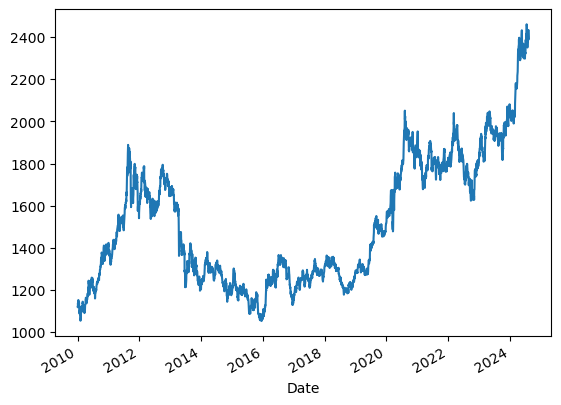

In [116]:
data['Close'].plot()

C:\Users\lenovo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



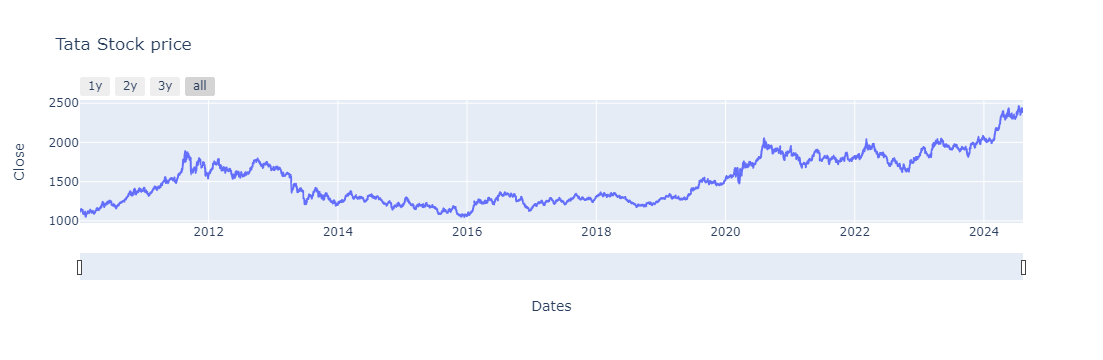

In [117]:
import plotly.express as px
fig = px.line(data, x='Dates', y='Close', title='Tata Stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Close'], model='multipicative', period=1)

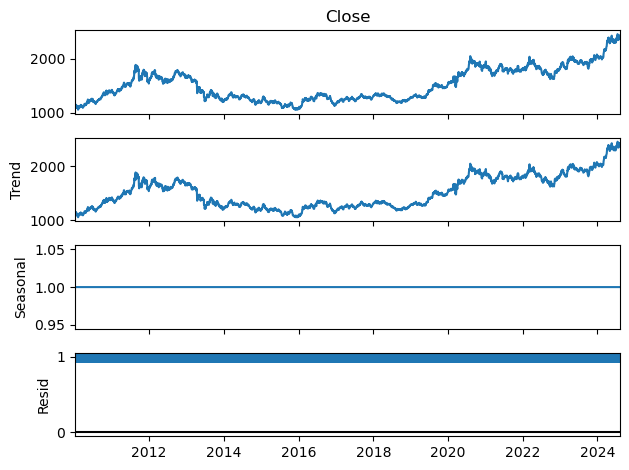

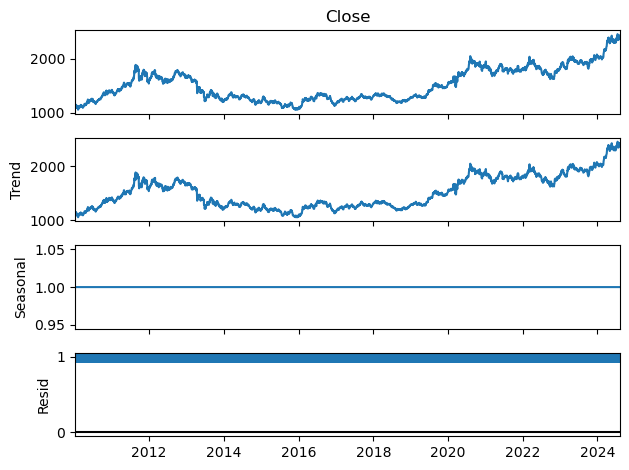

In [119]:
result.plot()

In [120]:
from statsmodels.tsa.stattools import adfuller

In [121]:
adf_result=adfuller(data['Close'])

In [122]:
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.234546
p-value: 0.934277
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [123]:
data['Close_diff']=data['Close'].diff().dropna()

<Axes: xlabel='Date'>

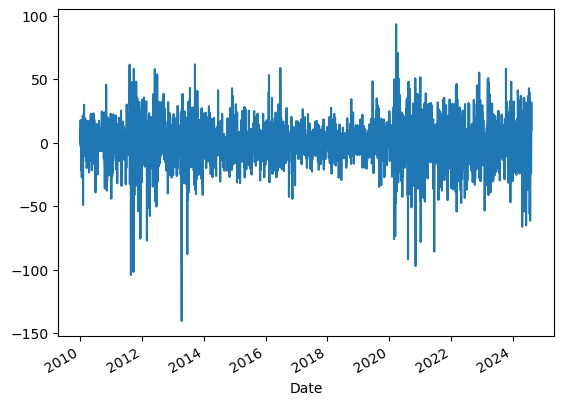

In [124]:
data['Close_diff'].plot()

In [125]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Year          0
Month         0
day           0
Name_week     0
Dates         0
Close_diff    1
dtype: int64

In [126]:
data.dropna(inplace=True)

In [127]:
result_2_adf=adfuller(data['Close_diff'])

In [128]:
print('ADF Statistic: %f' % result_2_adf[0])
print('p-value: %f' % result_2_adf[1])
print('Critical Values:')
for key, value in result_2_adf[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.150543
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [130]:
series_diff=data['Close_diff']

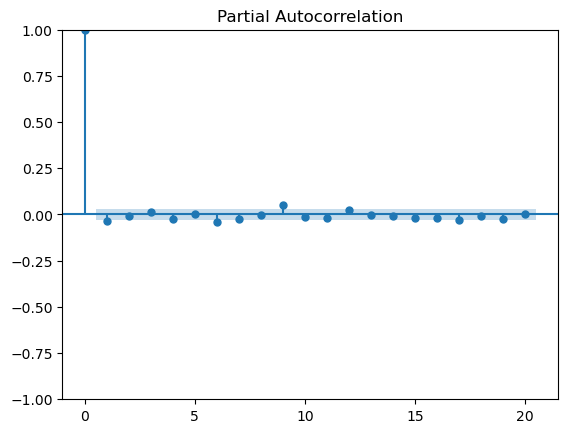

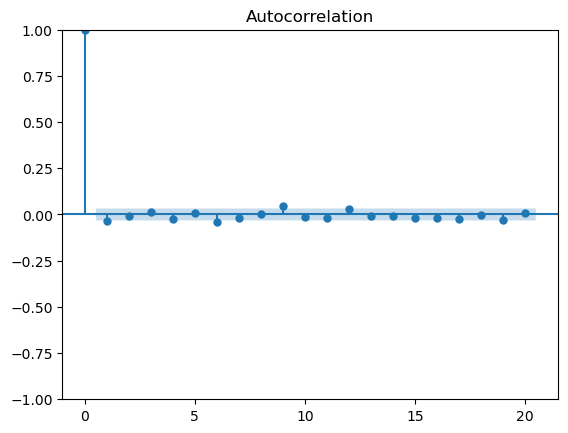

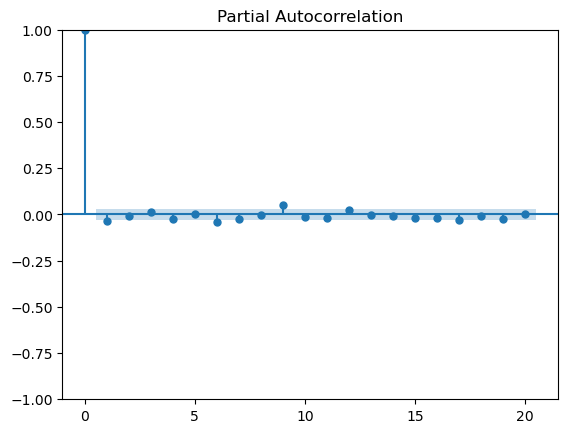

In [131]:
plot_acf(series_diff, lags=20)
plot_pacf(series_diff, lags=20)

Time Series Decompositio





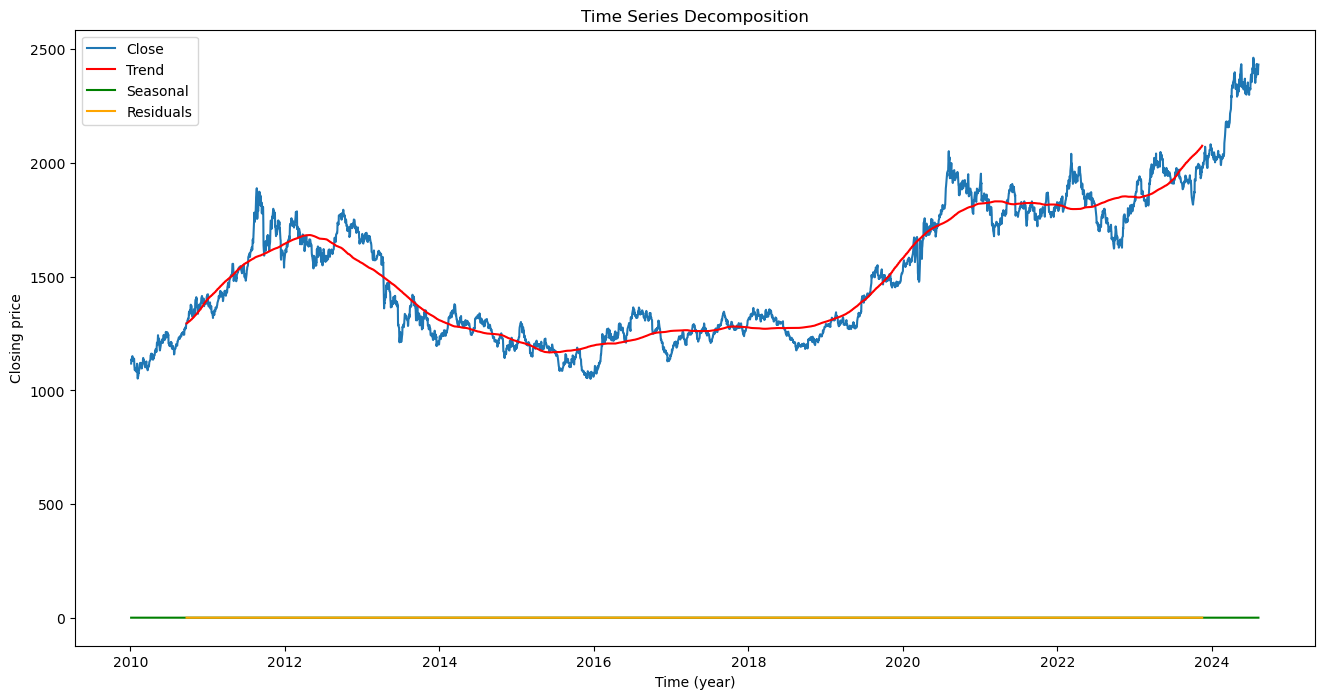

In [132]:
result = seasonal_decompose(data['Close'], model='multiplicative',period=365)
# Assuming daily data with 252 trading days in a year


print('Time Series Decompositio')
print('\n\n')

# Plot the original time series data
plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Close')

# Plot the trend component
plt.plot(result.trend, label='Trend', color='red')

# Plot the seasonal component
plt.plot(result.seasonal, label='Seasonal', color='green')

# Plot the re
plt.plot(result.resid, label='Residuals', color='orange')

plt.title('Time Series Decomposition')
plt.xlabel("Time (year)")
plt. ylabel ("Closing price")
plt.legend(loc='best')
plt.show()

In [133]:
data.sample()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day,Name_week,Dates,Close_diff
Date,,,,,,,,,,,,
2016-07-11,1371.699951,1371.800049,1353.0,1355.0,1355.0,26,2016,7,11,Monday,2016-07-11,-1.599976


<Axes: xlabel='Year'>

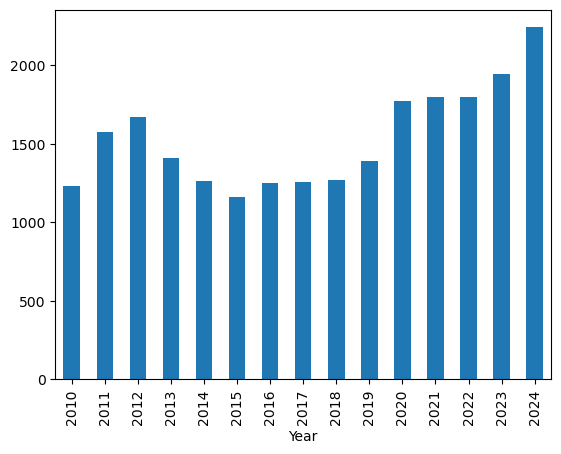

In [134]:
data.groupby('Year')['Close'].mean().plot.bar()

<Axes: xlabel='Month'>

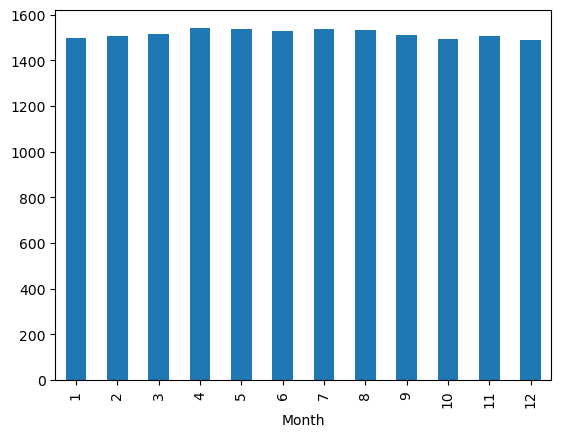

In [135]:
data.groupby('Month')['Close'].mean().plot.bar()

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3672 entries, 2010-01-05 to 2024-08-09
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Open        3672 non-null   float64       
 1   High        3672 non-null   float64       
 2   Low         3672 non-null   float64       
 3   Close       3672 non-null   float64       
 4   Adj Close   3672 non-null   float64       
 5   Volume      3672 non-null   int64         
 6   Year        3672 non-null   int32         
 7   Month       3672 non-null   int32         
 8   day         3672 non-null   int32         
 9   Name_week   3672 non-null   object        
 10  Dates       3672 non-null   datetime64[ns]
 11  Close_diff  3672 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), object(1)
memory usage: 329.9+ KB


In [137]:
data.drop(['Dates','Name_week'],axis=1,inplace=True)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3672 entries, 2010-01-05 to 2024-08-09
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        3672 non-null   float64
 1   High        3672 non-null   float64
 2   Low         3672 non-null   float64
 3   Close       3672 non-null   float64
 4   Adj Close   3672 non-null   float64
 5   Volume      3672 non-null   int64  
 6   Year        3672 non-null   int32  
 7   Month       3672 non-null   int32  
 8   day         3672 non-null   int32  
 9   Close_diff  3672 non-null   float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 272.5 KB


In [139]:
data.sample()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,day,Close_diff
Date,,,,,,,,,,
2018-10-23,1224.800049,1237.800049,1224.800049,1233.400024,1233.400024,33,2018,10,23,12.200073


In [184]:
daily_df=data.copy()

In [140]:
monthly_df = data.resample('M').mean()

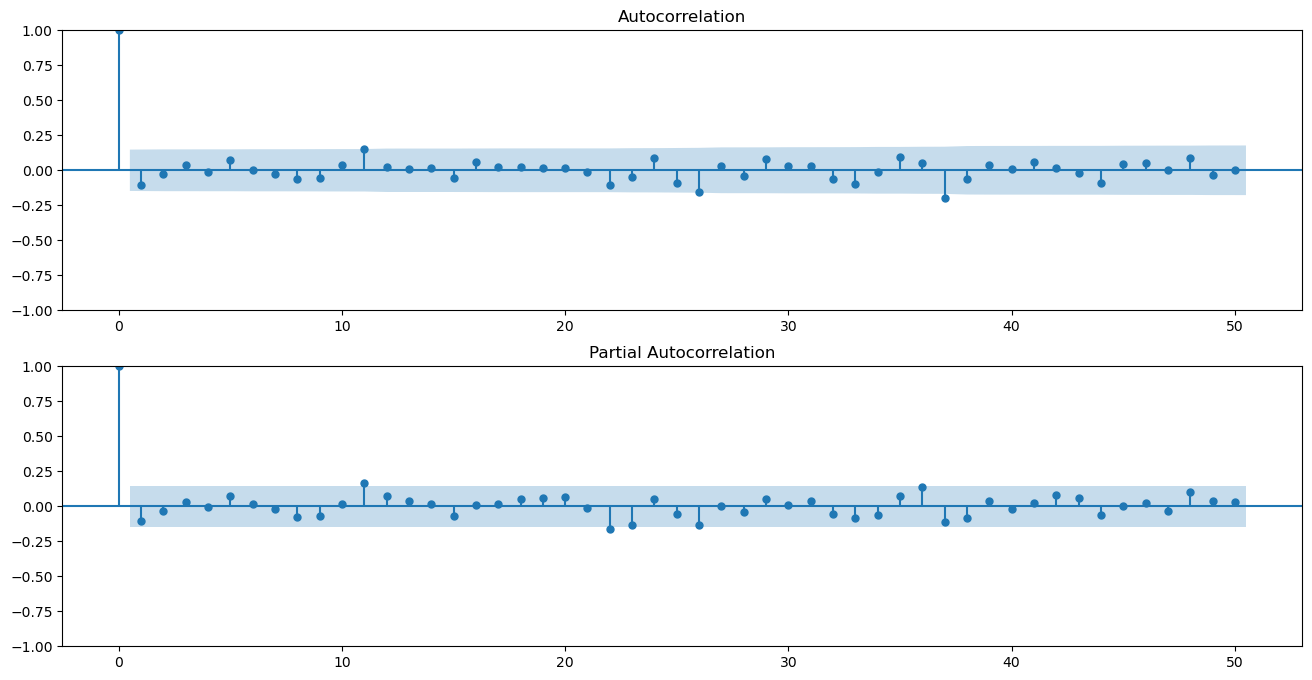

In [142]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(monthly_df['Close_diff'], lags=50, ax=ax[0])
plot_pacf(monthly_df['Close_diff'], lags=50, ax=ax[1])

plt.show()

In [185]:
series=daily_df['Close']

In [186]:
train_size=int(len(series)*0.80)

In [187]:
train_data,test_data=series[0:train_size],series[train_size:]

In [188]:
start=len(train_data)

In [189]:
start

2937

In [190]:
end=len(train_data)+len(test_data)-1

In [191]:
end

3671

In [192]:
from statsmodels.tsa.arima.model import ARIMA

In [273]:
 model=ARIMA(train_data,order=(2,1,3))

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [274]:
model_fit=model.fit()

In [275]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2937
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -12166.289
Date:                Sat, 10 Aug 2024   AIC                          24344.577
Time:                        15:13:12   BIC                          24380.486
Sample:                             0   HQIC                         24357.508
                               - 2937                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7461      0.015    117.771      0.000       1.717       1.775
ar.L2         -0.9693      0.014    -66.944      0.000      -0.998      -0.941
ma.L1         -1.7761      0.019    -94.690      0.000      -1.813      -1.739
ma.L2          1.0102      0.028     36.209      0.000       0.956       1.065
ma.L3         -0.0254      0.014     -1.863      0.062      -0.052       0.001
sigma2       232.6950      2.986     77.933      0.000     226.843     238.547
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8703.59
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [276]:
model_pred=model_fit.predict(start=start,end=end,type='levels')

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [277]:
test_data.tail()

Date
2024-08-05    2401.699951
2024-08-06    2389.100098
2024-08-07    2390.500000
2024-08-08    2422.199951
2024-08-09    2432.100098
Name: Close, dtype: float64

<Axes: >

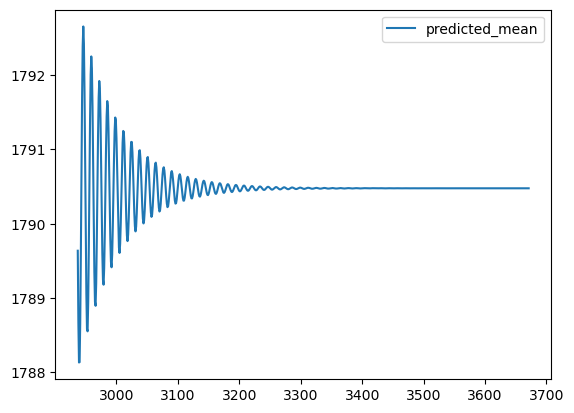

In [278]:
model_pred.plot(legend=True)


In [299]:
forecast_period = 1000 # Number of months to forecast
forecast_index = pd.date_range(start='2024-08-31', periods=forecast_period, freq='D')

In [300]:
forecast = model_fit.get_forecast(steps=forecast_period)

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [301]:
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [302]:
forecast_series = pd.Series(forecast_values)
forecast_series = pd.DataFrame(forecast_series)

In [303]:
print(forecast_series)

      predicted_mean
2937     1789.637315
2938     1788.668911
2939     1788.133846
2940     1788.138277
2941     1788.664675
...              ...
3932     1790.477155
3933     1790.477155
3934     1790.477155
3935     1790.477155
3936     1790.477155

[1000 rows x 1 columns]


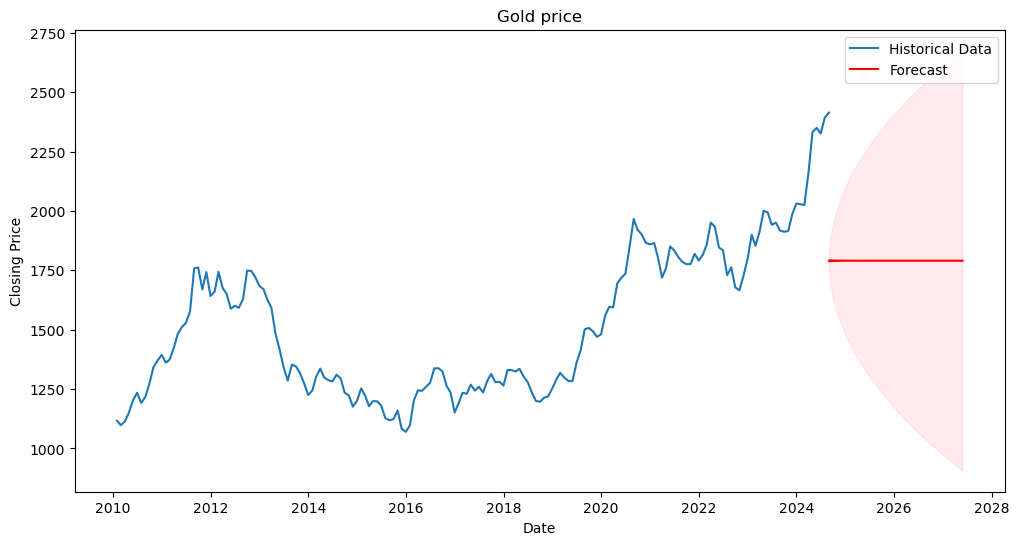

In [304]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['Close'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Gold price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [289]:
daily_forecast.isna().sum()

NameError: name 'daily_forecast' is not defined

In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
rmse = mean_squared_error(test_data, daily_forecast[:len(test_data)], squared=False)
print('\n\n')
print(f'Root Mean Squared Error: {rmse}')

NameError: name 'daily_forecast' is not defined

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24357.484, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24354.748, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24354.816, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24354.842, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24353.406, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24356.737, Time=1.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.972 seconds


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



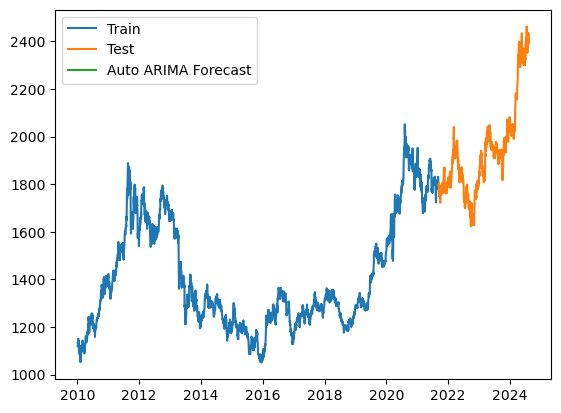

In [291]:
from pmdarima import auto_arima

# Fit auto_arima to find the best parameters
model_auto = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the ARIMA model with the best parameters
model_auto.fit(train_data)

# Make predictions
forecast_auto = model_auto.predict(n_periods=len(test_data))
forecast_auto = pd.DataFrame(forecast_auto,index = test_data.index,columns=['Prediction'])

# Plot the results
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast_auto, label='Auto ARIMA Forecast')
plt.legend(loc='best')
plt.show()

# Evaluate the model


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24357.484, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24354.748, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24354.816, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24354.842, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24353.406, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24356.737, Time=1.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.965 seconds


C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



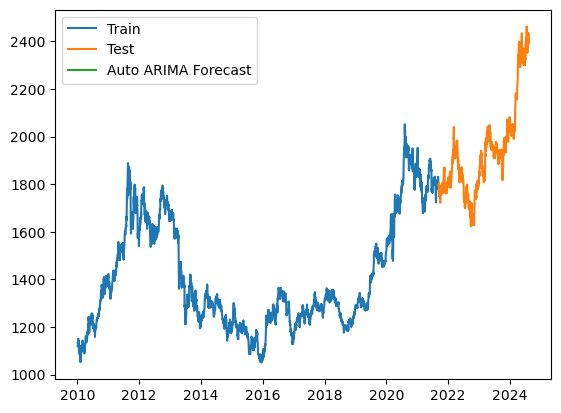

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



ValueError: Input contains NaN.

In [292]:
from pmdarima import auto_arima

# Fit auto_arima to find the best parameters
model_auto = auto_arima(train_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the ARIMA model with the best parameters
model_auto.fit(train_data)

# Make predictions
forecast_auto = model_auto.predict(n_periods=len(test_data))
forecast_auto = pd.DataFrame(forecast_auto,index = test_data.index,columns=['Prediction'])

# Plot the results
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast_auto, label='Auto ARIMA Forecast')
plt.legend(loc='best')
plt.show()

# Evaluate the model
rmse_auto = mean_squared_error(test_data, forecast_auto['Prediction'], squared=False)
print(f'RMSE for Auto ARIMA: {rmse_auto}')


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, max_diff_order=2, alpha=0.05):
    """
    Check stationarity of a time series using the Augmented Dickey-Fuller (ADF) test.
    If the series is not stationary, apply differencing recursively until stationarity is achieved.
    
    Parameters:
    - series: pandas Series, the time series data
    - max_diff_order: int, maximum order of differencing to be applied (default: 2)
    - alpha: float, significance level for ADF test (default: 0.05)
    
    Returns:
    - stationary_series: pandas Series, the stationary time series
    """
    # Perform ADF test
    adf_result = adfuller(series)
    p_value = adf_result[1]
    
    # If the series is already stationary, return the original series
    if p_value < alpha:
        print("Original series is stationary (p-value: {:.4f})".format(p_value))
        return series
    
    
    
    # If the series is not stationary, apply differencing
    print("Original series is not stationary (p-value: {:.4f}), applying differencing...".format(p_value))
    for diff_order in range(1, max_diff_order + 1):
        differenced_series = series.diff(diff_order).dropna()
        adf_result_diff = adfuller(differenced_series)
        p_value_diff = adf_result_diff[1]
        
        # Check stationarity after differencing
        if p_value_diff < alpha:
            print("Series after {} order differencing is stationary (p-value: {:.4f})".format(diff_order, p_value_diff))
            return differenced_series
        
    # If maximum differencing orders reached and still not stationary, return None
    print("Maximum differencing orders reached. Unable to achieve stationarity.")
    return None

# Example usage:
# Assuming 'time_series' is your pandas Series containing the time series data
# stationary_series = check_stationarity(time_series)


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae=mean_absolute_error(model_pred,test_data)
print(mae)

In [ ]:
import itertools

# Define the range of p, d, and q values to try
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# Generate all possible combinations of p, d, and q
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store the best model and its AIC
best_aic = float('inf')
best_pdq = None
best_model = None

# Iterate through all combinations and find the best one
for pdq in pdq_combinations:
    try:
        model = ARIMA(train_data, order=pdq)
        model_fit = model.fit()
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_pdq = pdq
            best_model = model_fit

    except:
        continue

print(f"Best ARIMA({best_pdq[0]}, {best_pdq[1]}, {best_pdq[2]}) AIC: {best_aic}")

# Use the best model for further analysis or forecasting

In [305]:
data['Close'].mean()

1516.280010115347